## SPRINT 2 - TEAM ID : PNT2022TMID00681

## MODEL BUILDING FOR VEGETABLE DISEASE PREDICTION

## Image Augumentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11386 images belonging to 9 classes.


In [5]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3431 images belonging to 9 classes.


## ADDING CNN

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


## HIDDEN LAYERS

In [13]:
model.add(Dense(300,activation='relu'))

In [14]:
model.add(Dense(150,activation='relu'))

## OUTPUT LAYER

In [15]:
model.add(Dense(9,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

475

In [18]:
1238/24

51.583333333333336

## Fitting the Model

In [21]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 363s 764ms/step - loss: 0.1242 - accuracy: 0.9575 - val_loss: 0.1193 - val_accuracy: 0.9542
Epoch 2/10
475/475 [==============================] - 358s 753ms/step - loss: 0.1344 - accuracy: 0.9525 - val_loss: 0.0698 - val_accuracy: 0.9781
Epoch 3/10
475/475 [==============================] - 352s 740ms/step - loss: 0.1263 - accuracy: 0.9598 - val_loss: 0.0694 - val_accuracy: 0.9758
Epoch 4/10
475/475 [==============================] - 352s 740ms/step - loss: 0.1149 - accuracy: 0.9614 - val_loss: 0.1659 - val_accuracy: 0.9458
Epoch 5/10
475/475 [==============================] - 352s 740ms/step - loss: 0.1210 - accuracy: 0.9592 - val_loss: 0.0914 - val_accuracy: 0.9706
Epoch 6/10
475/475 [==============================] - 354s 745ms/step - loss: 0.1085 - accuracy: 0.9631 - val_loss: 0.0548 - val_accuracy: 0.9843
Epoch 7/10
475/475 [==============================] - 354s 744ms/step - loss: 0.0999 - accuracy: 0.9664 - val_loss: 0.0750 -

In [22]:
model.save('vegetables.h5')

In [23]:
from tensorflow.keras.models import load_model

In [24]:
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('vegetables.h5')

In [26]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/c2281160-6ffd-40df-8293-779634299ff3___JR_Sept.L.S 2630.JPG",target_size=(128,128))

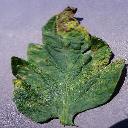

In [27]:
img

In [28]:
x = image.img_to_array(img)

In [29]:
x

array([[[157., 156., 188.],
        [160., 159., 191.],
        [161., 160., 192.],
        ...,
        [150., 146., 179.],
        [155., 151., 184.],
        [159., 155., 188.]],

       [[157., 156., 188.],
        [155., 154., 186.],
        [157., 156., 188.],
        ...,
        [150., 146., 179.],
        [149., 145., 178.],
        [149., 145., 178.]],

       [[159., 158., 190.],
        [155., 154., 186.],
        [157., 156., 188.],
        ...,
        [151., 147., 180.],
        [152., 148., 181.],
        [154., 150., 183.]],

       ...,

       [[100.,  94., 120.],
        [134., 128., 154.],
        [123., 117., 143.],
        ...,
        [ 13.,  16.,  33.],
        [ 13.,  16.,  33.],
        [ 14.,  17.,  34.]],

       [[151., 145., 171.],
        [121., 115., 141.],
        [112., 106., 132.],
        ...,
        [ 13.,  16.,  33.],
        [ 12.,  15.,  32.],
        [ 12.,  15.,  32.]],

       [[ 92.,  86., 112.],
        [131., 125., 151.],
        [130., 1

In [ ]:
x = np.expand_dims(x,axis=0)


In [31]:
x

array([[[157., 156., 188.],
        [160., 159., 191.],
        [161., 160., 192.],
        ...,
        [150., 146., 179.],
        [155., 151., 184.],
        [159., 155., 188.]],

       [[157., 156., 188.],
        [155., 154., 186.],
        [157., 156., 188.],
        ...,
        [150., 146., 179.],
        [149., 145., 178.],
        [149., 145., 178.]],

       [[159., 158., 190.],
        [155., 154., 186.],
        [157., 156., 188.],
        ...,
        [151., 147., 180.],
        [152., 148., 181.],
        [154., 150., 183.]],

       ...,

       [[100.,  94., 120.],
        [134., 128., 154.],
        [123., 117., 143.],
        ...,
        [ 13.,  16.,  33.],
        [ 13.,  16.,  33.],
        [ 14.,  17.,  34.]],

       [[151., 145., 171.],
        [121., 115., 141.],
        [112., 106., 132.],
        ...,
        [ 13.,  16.,  33.],
        [ 12.,  15.,  32.],
        [ 12.,  15.,  32.]],

       [[ 92.,  86., 112.],
        [131., 125., 151.],
        [130., 1

In [ ]:
y=np.argmax(model.predict(x),axis=1)

In [33]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [34]:
index[0]

'Pepper,_bell___Bacterial_spot'

In [35]:
img=image.load_img(r"/content/drive/MyDrive/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___healthy/b06117a8-6ca6-4b82-96cf-07604beb8f1b___JR_HL 5906.JPG",target_size=(128,128))

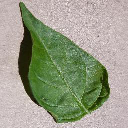

In [36]:
img

In [38]:
x = image.img_to_array(img)

In [39]:
x

array([[[199., 185., 184.],
        [196., 182., 181.],
        [191., 177., 176.],
        ...,
        [184., 168., 168.],
        [196., 180., 180.],
        [187., 171., 171.]],

       [[173., 159., 158.],
        [186., 172., 171.],
        [180., 166., 165.],
        ...,
        [186., 170., 170.],
        [191., 175., 175.],
        [193., 177., 177.]],

       [[189., 175., 174.],
        [190., 176., 175.],
        [194., 180., 179.],
        ...,
        [170., 154., 154.],
        [185., 169., 169.],
        [182., 166., 166.]],

       ...,

       [[214., 204., 203.],
        [207., 197., 196.],
        [194., 184., 183.],
        ...,
        [202., 187., 190.],
        [198., 183., 186.],
        [198., 183., 186.]],

       [[192., 182., 181.],
        [204., 194., 193.],
        [206., 196., 195.],
        ...,
        [206., 191., 194.],
        [200., 185., 188.],
        [183., 168., 171.]],

       [[201., 191., 190.],
        [202., 192., 191.],
        [216., 2

In [ ]:
x = np.expand_dims(x,axis=0)

In [40]:
x

array([[[199., 185., 184.],
        [196., 182., 181.],
        [191., 177., 176.],
        ...,
        [184., 168., 168.],
        [196., 180., 180.],
        [187., 171., 171.]],

       [[173., 159., 158.],
        [186., 172., 171.],
        [180., 166., 165.],
        ...,
        [186., 170., 170.],
        [191., 175., 175.],
        [193., 177., 177.]],

       [[189., 175., 174.],
        [190., 176., 175.],
        [194., 180., 179.],
        ...,
        [170., 154., 154.],
        [185., 169., 169.],
        [182., 166., 166.]],

       ...,

       [[214., 204., 203.],
        [207., 197., 196.],
        [194., 184., 183.],
        ...,
        [202., 187., 190.],
        [198., 183., 186.],
        [198., 183., 186.]],

       [[192., 182., 181.],
        [204., 194., 193.],
        [206., 196., 195.],
        ...,
        [206., 191., 194.],
        [200., 185., 188.],
        [183., 168., 171.]],

       [[201., 191., 190.],
        [202., 192., 191.],
        [216., 2

In [ ]:
y=np.argmax(model.predict(x),axis=1)

In [41]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [42]:
index[0]

'Pepper,_bell___Bacterial_spot'